# Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R and achieve the following goals:
Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized
Present the financial benefit of this project to the marketing team

# Binary Classification :
In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.In this case goal is to predict if the client will subscribe a term deposit

In [3]:
import  pandas  as  pd
import  numpy as  np                   # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs

# Data 
The data is related with direct marketing campaigns of a Portuguese banking institution.The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

In [97]:
data = pd.read_csv(r'C:\Users\karun\Desktop\SalesPrediction\bank\bank-full.csv',sep=';')

In [98]:
y = data['y']

In [99]:
y = y.replace(['yes','no'],(1,0))

In [19]:
import seaborn as sns

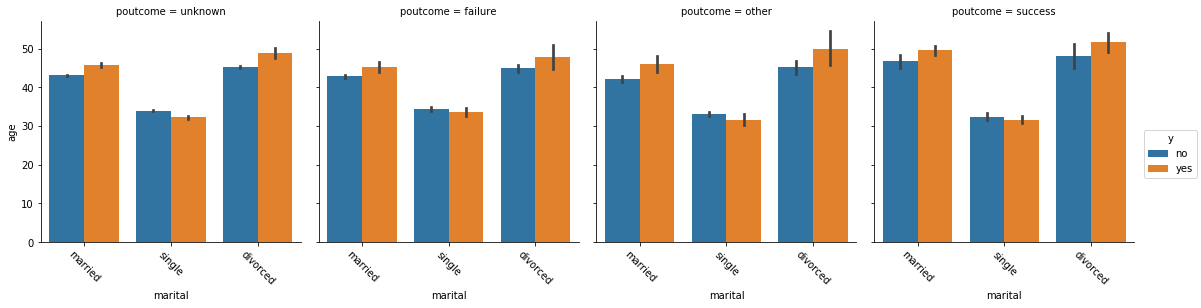

In [78]:
# Factor Plot
g = sns.factorplot(x='marital', 
                   y='age', 
                   data=data, 
                   hue='y',  # Color by stage
                   col='poutcome',
                  kind = 'bar')  # Separate by stage
                   
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

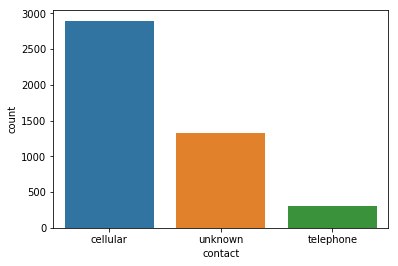

In [227]:
sns.countplot(x='contact', data=data)

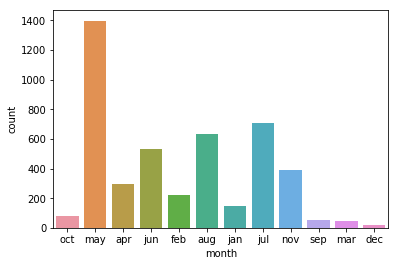

In [228]:
sns.countplot(x='month', data=data)

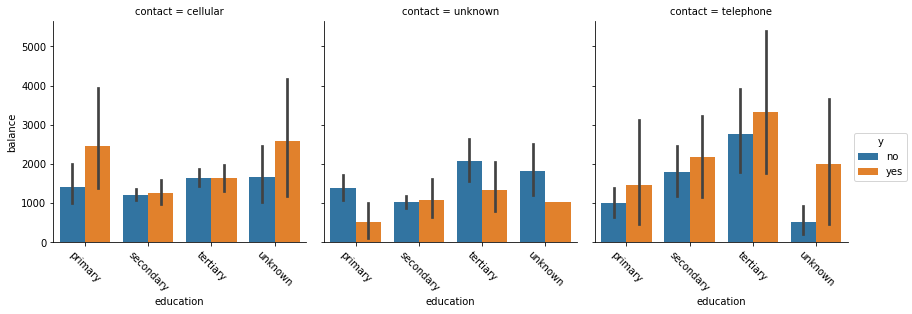

In [229]:
# Factor Plot
g = sns.factorplot(x='education', 
                   y='balance', 
                   data=data, 
                   hue='y',  # Color by stage
                   col='contact',
                  kind = 'bar')  # Separate by stage
                   
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

In [101]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

In [102]:
data = encode_features(data)

In [103]:
X = data.drop(['y'], axis = 1)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# logistic Regression

In [109]:
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
logreg = linear_model.LogisticRegression(penalty = 'l1' ,C=0.5)

In [111]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
y_pred = logreg.predict(X_test)

In [113]:
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import accuracy_score

In [114]:
cnf = confusion_matrix(y_pred,y_test)

In [115]:
cnf

array([[7810,  830],
       [ 172,  231]], dtype=int64)

In [116]:
accuracy_score(y_pred,y_test)

0.8891960632533451

# RandomForest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
ranfor = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=13,criterion='gini')

In [263]:
#X_train_reduced = X_train[['poutcome','age','month','duration','balance']]

In [264]:
#X_test_reduced = X_test[['poutcome','age','month','duration','balance']]

In [265]:
ranfor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [266]:
y_pred = ranfor.predict(X_test)

In [267]:
accuracy_score(y_pred,y_test)

0.9077739688156585

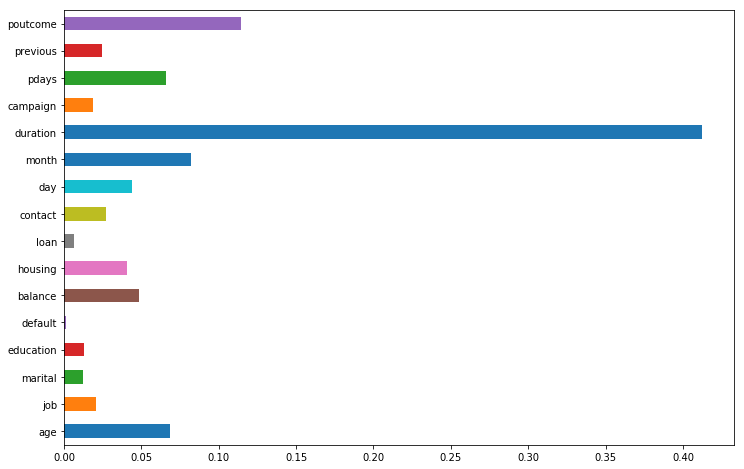

In [231]:
importances=pd.Series(ranfor.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

# MLPClassifier

In [157]:
from sklearn.neural_network import MLPClassifier

In [196]:
clf = MLPClassifier(alpha=1, hidden_layer_sizes=15)

In [197]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [198]:
y_pred = clf.predict(X_test)

In [199]:
accuracy_score(y_pred,y_test)

0.8797965277009842

In [268]:
importances=pd.Series(clf.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'

# knn

In [167]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
model = KNeighborsClassifier(5)

In [173]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [174]:
y_pred = model.predict(X_test)

In [175]:
accuracy_score(y_pred,y_test)

0.8780272033617162

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

# real data prediction for all the classifiers

In [208]:
bank_random = pd.read_csv(r'C:\Users\karun\Desktop\SalesPrediction\bank\bank.csv',sep=';')

In [209]:
y_random = bank_random['y']

In [210]:
y_random = y_random.replace(['yes','no'],(1,0))

In [211]:
X_random = bank_random.drop(['y'], axis = 1)

In [215]:
X_random = encode_features(X_random)

In [218]:
y_pred_knn = model.predict(X_random)

In [222]:
accuracy_score(y_pred_knn,y_random)

0.9059942490599425

In [219]:
y_pred_clf = clf.predict(X_random)

In [223]:
accuracy_score(y_pred_clf,y_random)

0.878124308781243

In [220]:
y_pred_logreg = logreg.predict(X_random)

In [224]:
accuracy_score(y_pred_logreg,y_random)

0.8885202388852024

In [221]:
y_pred_ranfor = ranfor.predict(X_random)

In [225]:
accuracy_score(y_pred_ranfor,y_random)

0.9267861092678611